In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df= pd.read_csv('gre.csv', encoding= 'latin')
df.columns

Index(['Serial No.', 'Student Name', 'GRE Score', 'TOEFL Score',
       'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Admitted'],
      dtype='object')

In [3]:
df= df.drop(['Student Name', 'Serial No.'], axis=1)

In [4]:
df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,Y
1,324,107,4,4.0,4.5,8.87,1,N
2,316,104,3,3.0,3.5,8.00,1,N
3,322,110,3,3.5,2.5,8.67,1,N
4,314,103,2,2.0,3.0,8.21,0,N


In [5]:
label_encoder= LabelEncoder()
df['Admitted']= label_encoder.fit_transform(df['Admitted'])

In [6]:
cor= df.corr()['Admitted']
print(cor)

GRE Score            0.575152
TOEFL Score          0.598192
University Rating    0.514750
SOP                  0.476360
LOR                  0.427809
CGPA                 0.615297
Research             0.357641
Admitted             1.000000
Name: Admitted, dtype: float64


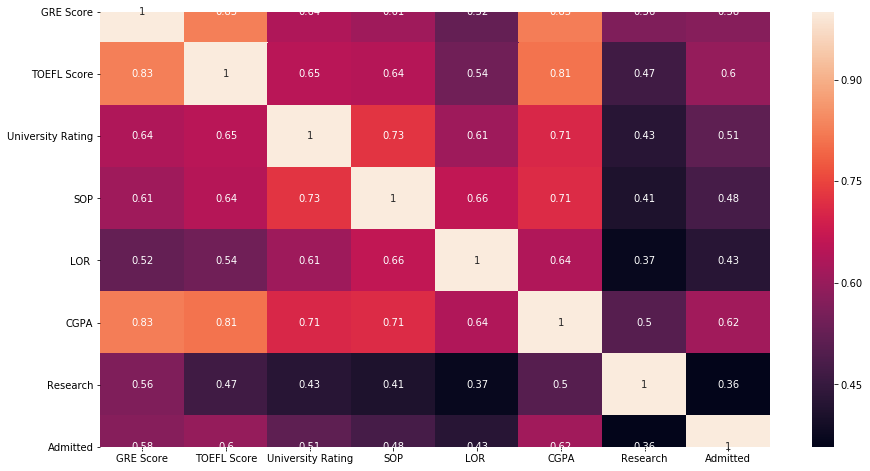

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
X = df.iloc[:, 0:2].values
y = df.iloc[:, 7].values

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [11]:
y_pred = regressor.predict([[335,112]])
y_pred

array([1.])